In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from train import train_fidelity, train_base
from models.mnist_cnn import CNN3b, CNN4b
from loaders.mnist_loader import MNIST_data
from torch.optim import Adam, Adadelta
from losses.losses import FidelityConstraint, StandardCrossEntropy
from metrics.metrics import accuracy, MoRF

In [6]:
loaders = MNIST_data(batch_size = 10)

In [7]:
print("CUDA Available: ",torch.cuda.is_available())
use_cuda=True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


In [8]:
 torch.cuda.empty_cache()

In [9]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 2060 with Max-Q Design
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [10]:
bmodel0 = CNN3b().to(device)
optimizer0 = Adam(bmodel0.parameters(), lr = 0.01)   

In [17]:
bmodel1 = CNN4b().to(device)
optimizer1 = Adadelta(bmodel1.parameters())   

In [14]:
acc0, loss0 = train_base(bmodel0, loaders, 5, optimizer0, StandardCrossEntropy())

C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\losses\losses.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_probabilities = self.log_softmax(outputs)


Epoch [1/5], Step [100/6000], Loss: 1.1372
Epoch [1/5], Step [200/6000], Loss: 0.1909
Epoch [1/5], Step [300/6000], Loss: 0.0196
Epoch [1/5], Step [400/6000], Loss: 0.4554
Epoch [1/5], Step [500/6000], Loss: 0.7083
Epoch [1/5], Step [600/6000], Loss: 0.6486
Epoch [1/5], Step [700/6000], Loss: 0.2843
Epoch [1/5], Step [800/6000], Loss: 0.0212
Epoch [1/5], Step [900/6000], Loss: 0.0100
Epoch [1/5], Step [1000/6000], Loss: 0.1379
Epoch [1/5], Step [1100/6000], Loss: 0.4069
Epoch [1/5], Step [1200/6000], Loss: 0.0920
Epoch [1/5], Step [1300/6000], Loss: 1.0372
Epoch [1/5], Step [1400/6000], Loss: 0.4989
Epoch [1/5], Step [1500/6000], Loss: 0.0906
Epoch [1/5], Step [1600/6000], Loss: 0.6412
Epoch [1/5], Step [1700/6000], Loss: 0.2523
Epoch [1/5], Step [1800/6000], Loss: 0.0031
Epoch [1/5], Step [1900/6000], Loss: 0.0280
Epoch [1/5], Step [2000/6000], Loss: 0.6441
Epoch [1/5], Step [2100/6000], Loss: 0.0707
Epoch [1/5], Step [2200/6000], Loss: 0.0379
Epoch [1/5], Step [2300/6000], Loss: 0.00

Epoch [4/5], Step [700/6000], Loss: 0.5075
Epoch [4/5], Step [800/6000], Loss: 0.0100
Epoch [4/5], Step [900/6000], Loss: 0.0585
Epoch [4/5], Step [1000/6000], Loss: 0.4386
Epoch [4/5], Step [1100/6000], Loss: 0.0468
Epoch [4/5], Step [1200/6000], Loss: 0.0017
Epoch [4/5], Step [1300/6000], Loss: 0.4934
Epoch [4/5], Step [1400/6000], Loss: 0.0208
Epoch [4/5], Step [1500/6000], Loss: 0.0770
Epoch [4/5], Step [1600/6000], Loss: 0.0381
Epoch [4/5], Step [1700/6000], Loss: 0.0045
Epoch [4/5], Step [1800/6000], Loss: 0.6700
Epoch [4/5], Step [1900/6000], Loss: 0.0295
Epoch [4/5], Step [2000/6000], Loss: 0.0154
Epoch [4/5], Step [2100/6000], Loss: 0.6300
Epoch [4/5], Step [2200/6000], Loss: 0.2690
Epoch [4/5], Step [2300/6000], Loss: 0.5944
Epoch [4/5], Step [2400/6000], Loss: 0.0277
Epoch [4/5], Step [2500/6000], Loss: 0.0375
Epoch [4/5], Step [2600/6000], Loss: 0.2718
Epoch [4/5], Step [2700/6000], Loss: 0.0017
Epoch [4/5], Step [2800/6000], Loss: 0.0022
Epoch [4/5], Step [2900/6000], Loss

In [15]:
accuracy(bmodel0,loaders)

0.9628

In [16]:
torch.save(bmodel0, r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_9628.pt")

In [18]:
acc1, loss1 = train_base(bmodel1, loaders, 5, optimizer1, StandardCrossEntropy())

Epoch [1/5], Step [100/6000], Loss: 0.3109
Epoch [1/5], Step [200/6000], Loss: 0.6172
Epoch [1/5], Step [300/6000], Loss: 0.1983
Epoch [1/5], Step [400/6000], Loss: 0.4424
Epoch [1/5], Step [500/6000], Loss: 0.0043
Epoch [1/5], Step [600/6000], Loss: 0.0476
Epoch [1/5], Step [700/6000], Loss: 0.0270
Epoch [1/5], Step [800/6000], Loss: 0.0242
Epoch [1/5], Step [900/6000], Loss: 0.0158
Epoch [1/5], Step [1000/6000], Loss: 0.2321
Epoch [1/5], Step [1100/6000], Loss: 0.1812
Epoch [1/5], Step [1200/6000], Loss: 0.6494
Epoch [1/5], Step [1300/6000], Loss: 0.0016
Epoch [1/5], Step [1400/6000], Loss: 0.1750
Epoch [1/5], Step [1500/6000], Loss: 0.0030
Epoch [1/5], Step [1600/6000], Loss: 0.1515
Epoch [1/5], Step [1700/6000], Loss: 0.4223
Epoch [1/5], Step [1800/6000], Loss: 0.0449
Epoch [1/5], Step [1900/6000], Loss: 0.0821
Epoch [1/5], Step [2000/6000], Loss: 0.0031
Epoch [1/5], Step [2100/6000], Loss: 0.0037
Epoch [1/5], Step [2200/6000], Loss: 0.0001
Epoch [1/5], Step [2300/6000], Loss: 0.42

Epoch [4/5], Step [700/6000], Loss: 0.0035
Epoch [4/5], Step [800/6000], Loss: 0.0000
Epoch [4/5], Step [900/6000], Loss: 0.0375
Epoch [4/5], Step [1000/6000], Loss: 0.0008
Epoch [4/5], Step [1100/6000], Loss: 0.0000
Epoch [4/5], Step [1200/6000], Loss: 0.0000
Epoch [4/5], Step [1300/6000], Loss: 0.0018
Epoch [4/5], Step [1400/6000], Loss: 0.0000
Epoch [4/5], Step [1500/6000], Loss: 0.0000
Epoch [4/5], Step [1600/6000], Loss: 0.0000
Epoch [4/5], Step [1700/6000], Loss: 0.0000
Epoch [4/5], Step [1800/6000], Loss: 0.0000
Epoch [4/5], Step [1900/6000], Loss: 0.0000
Epoch [4/5], Step [2000/6000], Loss: 0.0000
Epoch [4/5], Step [2100/6000], Loss: 0.0000
Epoch [4/5], Step [2200/6000], Loss: 0.0000
Epoch [4/5], Step [2300/6000], Loss: 0.0000
Epoch [4/5], Step [2400/6000], Loss: 0.0000
Epoch [4/5], Step [2500/6000], Loss: 0.0658
Epoch [4/5], Step [2600/6000], Loss: 0.0999
Epoch [4/5], Step [2700/6000], Loss: 0.0018
Epoch [4/5], Step [2800/6000], Loss: 0.0012
Epoch [4/5], Step [2900/6000], Loss

In [19]:
accuracy(bmodel1,loaders)

0.9881

In [20]:
torch.save(bmodel1, r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\4b_cnn_adadelta_9881.pt")

In [29]:
model0 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_fid_9684.pt")
model0.eval()

CNN3b(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [30]:
model1 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\\4b_cnn_adadelta_fid_9518.pt")
model1.eval()

CNN4b(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (dense1): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
  )
  (dense2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [13]:
accuracy(model0,loaders)

0.9684

In [11]:
accuracy(model1,loaders)

0.9518

In [21]:
perc = list(sorted(np.linspace(0, 100, num=20).astype(int), reverse=True))

In [31]:
drop0 = MoRF(model0, loaders, perc)

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\captum\_utils\gradient.py:58: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\metrics\metrics.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  d = softm(model(images.cuda()*maskpos.cuda())).cpu().detach().numpy()[0,torch.argmax(softm(model(images.cuda())))]/torch.max(softm(model(images.cuda()))).cpu().detach().numpy()


In [32]:
drop1 = MoRF(model1, loaders, perc)

In [27]:
bdrop0

array([1.        , 0.9961991 , 0.9939671 , 0.99067806, 0.98420988,
       0.9780885 , 0.9700118 , 0.96019138, 0.94048305, 0.9192363 ,
       0.88569709, 0.84696926, 0.78146375, 0.71755237, 0.6442615 ,
       0.56283756, 0.46812199, 0.3835839 , 0.3055036 , 0.23282925])

In [18]:
1-drop1

array([0.        , 0.29093052, 0.52430298, 0.64878743, 0.73880627,
       0.79103772, 0.83093271, 0.85483369, 0.87438611, 0.88347648,
       0.89230496, 0.8911447 , 0.88981796, 0.89067377, 0.89124072,
       0.89276235, 0.89346811, 0.89252203, 0.89292844, 0.89223848])

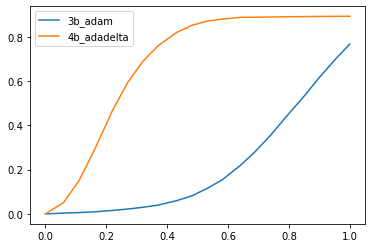

In [28]:
plt.plot(1-np.array(perc)/100, 1-bdrop0, label="3b_adam")
plt.plot(1-np.array(perc)/100, 1-bdrop1, label="4b_adadelta")
plt.legend()
plt.show()

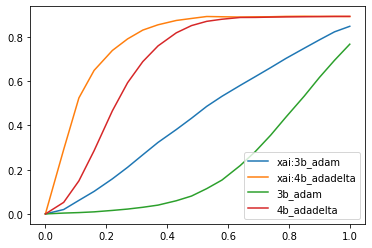

In [33]:
plt.title("MoRF curve")
plt.plot(1-np.array(perc)/100, 1-drop0, label="xai:3b_adam")
plt.plot(1-np.array(perc)/100, 1-drop1, label="xai:4b_adadelta")
plt.plot(1-np.array(perc)/100, 1-bdrop0, label="3b_adam")
plt.plot(1-np.array(perc)/100, 1-bdrop1, label="4b_adadelta")
plt.xlabel("% pix removed")
plt.ylabel("avg error")
plt.legend()
plt.savefig(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\MoRF_curve_fidelity_3b4b.png")
plt.show()

In [38]:
np.mean(1-drop0)

0.4373033463348592

In [39]:
np.mean(1-drop1)

0.7678295304900484

In [40]:
np.mean(1-bdrop1)

0.6769576146917377

In [41]:
np.mean(1-bdrop0)

0.2219057289009787